## Sagnac Frequency - Backscatter Correction - Multi Day

## Imports

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat, read_csv
from obspy import UTCDateTime, read
from scipy.signal import hilbert


In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [14]:
config = {}

config['ring'] = "U"

config['seed'] = "BW.DROMY..FJU"

config['path_to_sds'] = archive_path+"romy_archive/"


config['tbeg'] = UTCDateTime("2023-09-19 00:00")
config['tend'] = UTCDateTime("2023-09-20 00:00")

# config['f_lower_zoomin'], config['f_upper_zoomin'] = 448-10, 448+10

## path to Sagnac data
config['path_to_autodata'] = archive_path+f"romy_autodata/"

config['path_to_data'] = data_path+"sagnac_frequency/data/backscatter/"

config['path_to_figs'] = data_path+"sagnac_frequency/figures/"

## Configurations

In [10]:
interval = 60 ## seconds

method = "fft" ## welch | multitaper | fft

dates = date_range(config['tbeg'].date, config['tend'].date)

In [15]:
def __load_backscatter_data(tbeg, tend, ring, path_to_data):

    from obspy import UTCDateTime
    from datetime import date
    from pandas import read_pickle, concat, DataFrame, date_range

    t1 = date.fromisoformat(str(UTCDateTime(tbeg).date))
    t2 = date.fromisoformat(str((UTCDateTime(tend)-86400).date))

    df = DataFrame()
    for dat in date_range(t1, t2):
        print(dat)
        file = f"FJ{ring}_"+str(dat)[:10].replace("-","")+"_backscatter.pkl"
        try:
            df0 = read_pickle(path_to_data+file)
            df = concat([df, df0])
        except:
            print(f"error for {file}")

    df.reset_index(inplace=True)

    return df

In [18]:
bs = __load_backscatter_data(config['tbeg'], config['tend'], config['ring'], config['path_to_data'])

2023-09-19 00:00:00


In [19]:
bs

,index,time1,time2,fj_fs,fj_ac,fj_dc,fj_ph,f1_fs,f1_ac,f1_dc,f1_ph,f2_fs,f2_ac,f2_dc,f2_ph,w_s
0,0,2023-09-19T00:00:00.000000Z,2023-09-19T00:01:00.000000Z,303.060160,0.073224,0.195905,0.197328,303.060479,0.006733,0.834190,2.797403,303.055961,0.002937,0.815015,-1.908576,303.060091
1,1,2023-09-19T00:01:00.000000Z,2023-09-19T00:02:00.000000Z,303.060306,0.074772,0.196206,-2.089324,303.061106,0.006873,0.834288,0.464413,303.062215,0.003005,0.814646,-4.245801,303.060214
2,2,2023-09-19T00:02:00.000000Z,2023-09-19T00:03:00.000000Z,303.060723,0.075123,0.196174,-4.332173,303.061565,0.006841,0.834242,-1.812212,303.049780,0.003024,0.814968,-6.525569,303.060617
3,3,2023-09-19T00:03:00.000000Z,2023-09-19T00:04:00.000000Z,303.060562,0.072973,0.196342,-6.668228,303.061123,0.006618,0.834208,-4.195280,303.062879,0.002940,0.815975,-8.905413,303.060477
4,4,2023-09-19T00:04:00.000000Z,2023-09-19T00:05:00.000000Z,303.060630,0.073003,0.196380,-9.025958,303.062650,0.006648,0.834319,-6.599382,303.053542,0.002963,0.815795,-11.309047,303.060546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1435,2023-09-19T23:55:00.000000Z,2023-09-19T23:56:00.000000Z,302.863412,0.000695,0.471687,169.402275,302.962797,0.000145,1.208388,158.243129,302.578221,0.000098,1.885224,130.052937,302.863413
1436,1436,2023-09-19T23:56:00.000000Z,2023-09-19T23:57:00.000000Z,302.795181,0.000404,0.472061,172.441516,302.977187,0.000083,1.208440,155.603440,302.460231,0.000095,1.888432,132.624602,302.795182
1437,1437,2023-09-19T23:57:00.000000Z,2023-09-19T23:58:00.000000Z,302.865362,0.000505,0.472402,173.574676,302.615883,0.000092,1.208282,158.572044,302.352413,0.000097,1.891617,132.183910,302.865362
1438,1438,2023-09-19T23:58:00.000000Z,2023-09-19T23:59:00.000000Z,302.862931,0.000832,0.472704,173.313013,302.519061,0.000159,1.208519,159.245827,302.459856,0.000102,1.894120,133.455465,302.862930


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


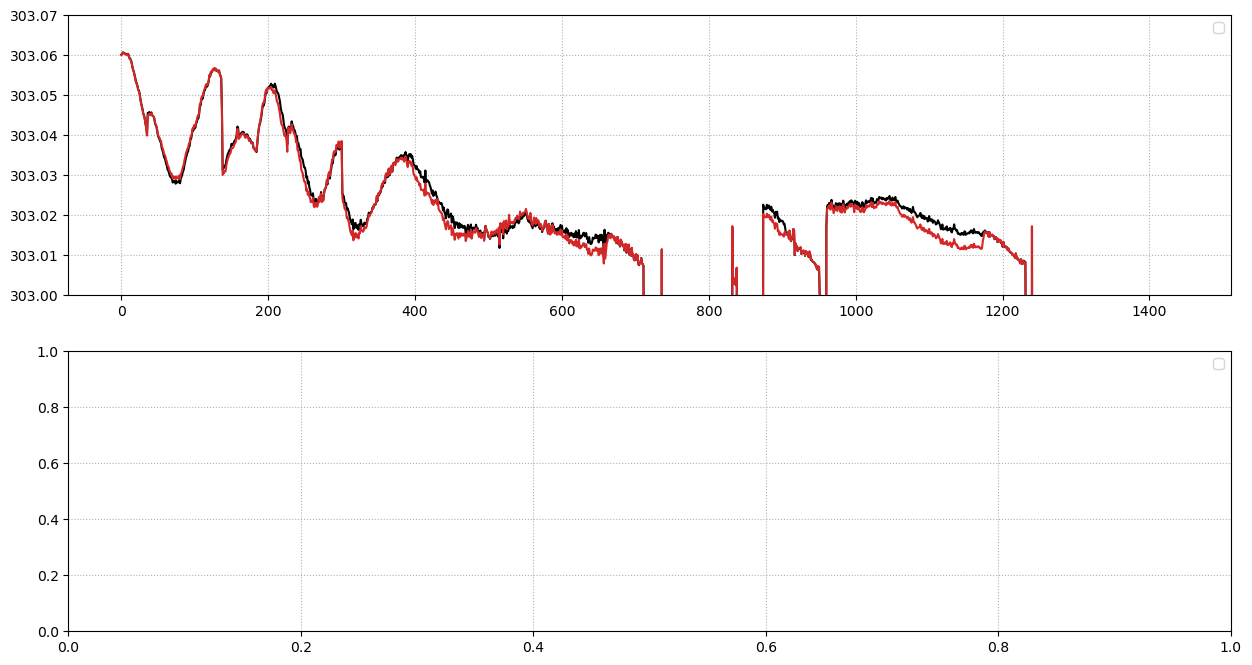

In [28]:
def __makeplot():

    Nrow, Ncol = 2, 1

    font = 12

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8))

    ax[0].plot(bs.index, bs.fj_fs, color="black")
    ax[0].plot(bs.index, bs.w_s, color="tab:red")

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        ax[_n].legend(loc=1)

    ax[0].set_ylim(303, 303.07)

    plt.show();
    return fig


fig = __makeplot();